In [1]:
# Cross Correlation Functions and Lagged Regressions
# Time series data
#  description and modeling of the relationship between two time series.
#sample cross correlation function (CCF) 

In [ ]:
# https://crudata.uea.ac.uk/cru/data/soi/soi.dat
# ASTSA is a windows time series package 



Attaching package: 'astsa'

The following objects are masked _by_ '.GlobalEnv':

    rec, soi



[1]  0.377  0.246  0.311  0.104 -0.016  0.235

[1] 68.63 68.63 68.63 68.63 68.63 68.63

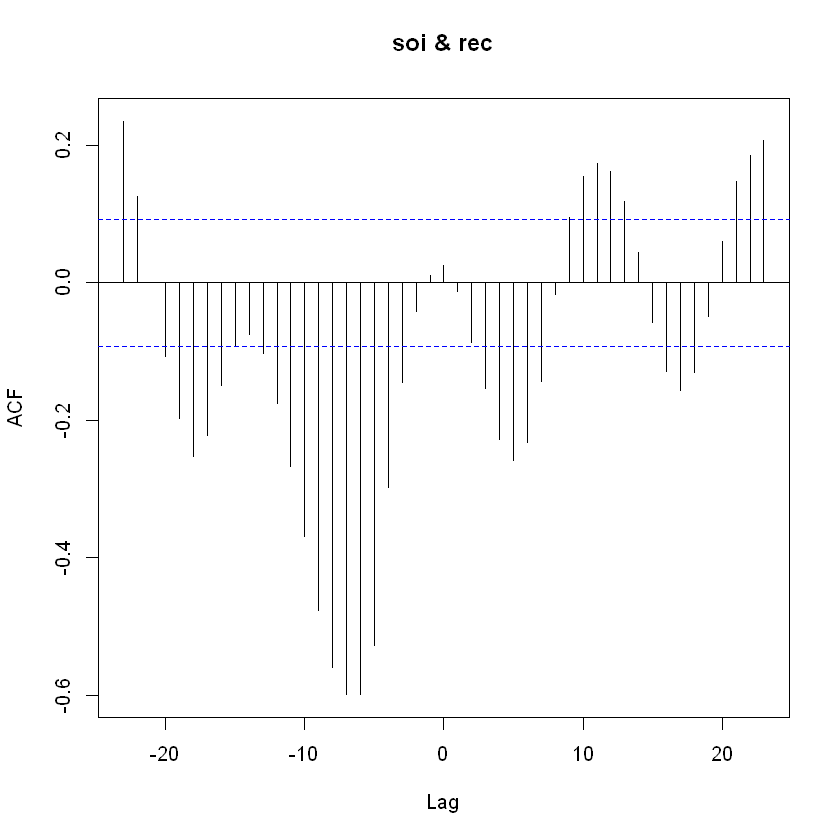

In [14]:
library(astsa) 

soi= scan("C:\\Users\\pavan\\Downloads\\soi.dat.txt")
rec = scan("C:\\Users\\pavan\\Downloads\\recruit.dat.txt")
head(soi)
head(rec)
soi=ts (soi)
rec = ts(rec)
ccf (soi, rec) # Cross correlation between time series

In [8]:
soi

Time Series:
Start = 1 
End = 453 
Frequency = 1 
  [1]  0.3770000  0.2460000  0.3110000  0.1040000 -0.0160000  0.2350000
  [7]  0.1370000  0.1910000 -0.0160000  0.2900000  0.0380000 -0.0160000
 [13] -0.1580000  0.3660000  0.6070000 -0.3550000 -0.1800000  0.2680000
 [19]  0.0930000  0.0270000  0.2460000  0.2020000  0.4320000  0.6170000
 [25]  0.7600000  0.8910000  0.6070000  0.5740000  0.0050000  0.4750000
 [31]  0.2020000 -0.0270000 -0.0380000  0.7160000  0.8360000  0.8910000
 [37]  0.5300000  0.5300000  0.3770000 -0.2350000 -0.5850000 -0.1800000
 [43] -0.5300000 -0.4640000 -0.4430000  0.0490000  0.4540000  0.2570000
 [49]  0.4100000  0.2240000  0.1480000 -0.4320000 -0.0930000 -0.2680000
 [55]  0.1580000 -0.0600000 -0.3990000  0.2350000  0.3660000  0.2020000
 [61]  0.3440000 -0.0380000  0.2900000 -0.1260000 -0.3660000 -0.1150000
 [67] -0.3010000 -0.4860000 -0.1370000  0.7380000  0.3660000  0.3660000
 [73]  0.6500000  0.6280000  0.1260000  0.1690000  0.1370000 -0.2570000
 [79]  0.16900


Autocorrelations of series 'X', by lag

   -23    -22    -21    -20    -19    -18    -17    -16    -15    -14    -13 
 0.235  0.125  0.000 -0.108 -0.198 -0.253 -0.222 -0.149 -0.092 -0.076 -0.103 
   -12    -11    -10     -9     -8     -7     -6     -5     -4     -3     -2 
-0.175 -0.267 -0.369 -0.476 -0.560 -0.598 -0.599 -0.527 -0.297 -0.146 -0.042 
    -1      0      1      2      3      4      5      6      7      8      9 
 0.011  0.025 -0.013 -0.086 -0.154 -0.228 -0.259 -0.232 -0.144 -0.017  0.094 
    10     11     12     13     14     15     16     17     18     19     20 
 0.154  0.174  0.162  0.118  0.043 -0.057 -0.129 -0.156 -0.131 -0.049  0.060 
    21     22     23 
 0.147  0.184  0.206 

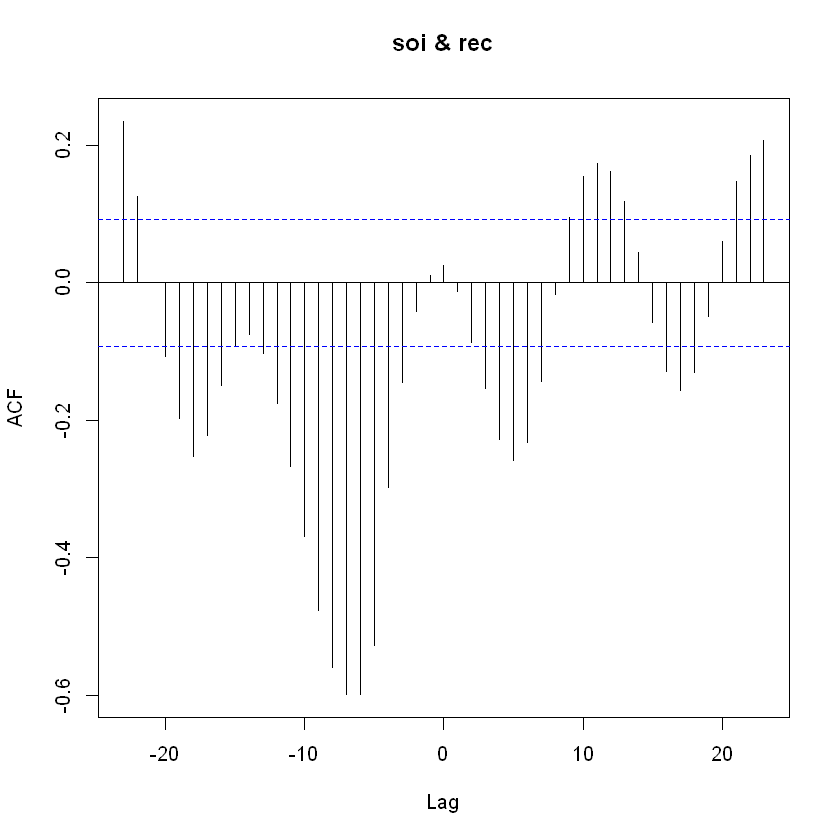

In [11]:
ccfvalues = ccf(soi,rec)
ccfvalues

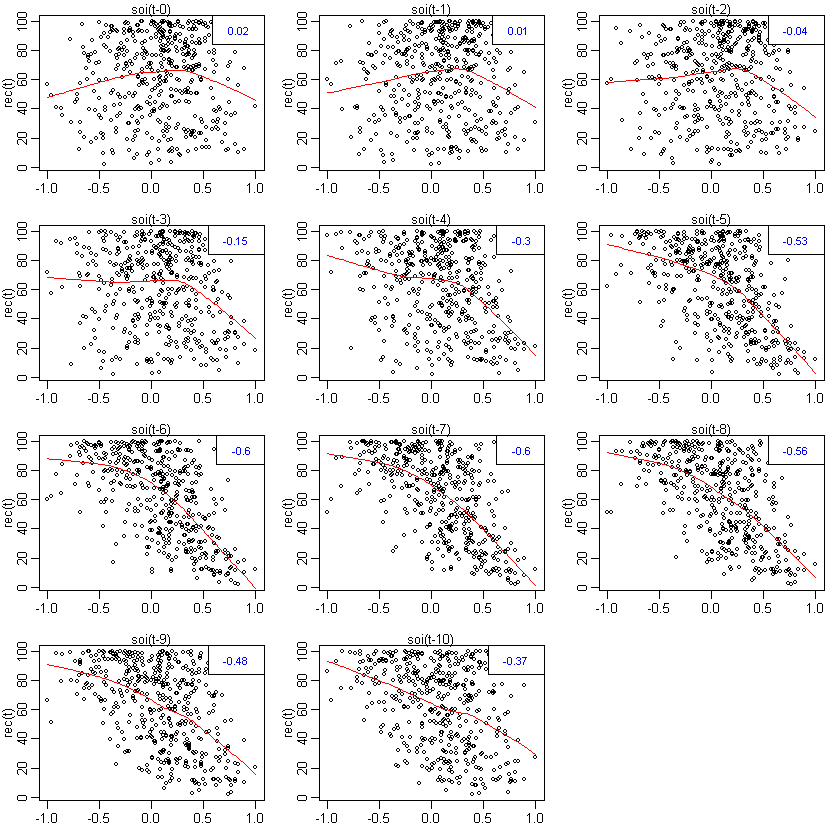

In [15]:
lag2.plot (soi, rec, 10)


In [16]:
alldata=ts.intersect(rec,reclag1=lag(rec,-1), reclag2=lag(rec,-2), soilag5 = lag(soi,-5),
soilag6=lag(soi,-6), soilag7=lag(soi,-7), soilag8=lag(soi,-8), soilag9=lag(soi,-9),
soilag10=lag(soi,-10))
tryit = lm(rec~soilag5+soilag6+soilag7+soilag8+soilag9+soilag10, data = alldata)
summary (tryit)



Call:
lm(formula = rec ~ soilag5 + soilag6 + soilag7 + soilag8 + soilag9 + 
    soilag10, data = alldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-69.199 -11.593   1.143  12.946  34.494 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  69.2743     0.8703  79.601  < 2e-16 ***
soilag5     -23.8255     2.7657  -8.615  < 2e-16 ***
soilag6     -15.3775     3.1651  -4.858 1.65e-06 ***
soilag7     -11.7711     3.1665  -3.717 0.000228 ***
soilag8     -11.3008     3.1664  -3.569 0.000398 ***
soilag9      -9.1525     3.1651  -2.892 0.004024 ** 
soilag10    -16.7219     2.7693  -6.038 3.33e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 17.42 on 436 degrees of freedom
Multiple R-squared:  0.6251,	Adjusted R-squared:   0.62 
F-statistic: 121.2 on 6 and 436 DF,  p-value: < 2.2e-16


ACF,PACF
0.85,0.85
0.64,-0.31
0.44,-0.04
0.27,-0.04
0.16,0.05
0.05,-0.16
-0.06,-0.09
-0.15,-0.03
-0.23,-0.10
-0.28,-0.03



Call:
lm(formula = rec ~ reclag1 + reclag2 + soilag5 + soilag6 + soilag7 + 
    soilag8 + soilag9 + soilag10, data = alldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.467  -2.855  -0.043   3.107  28.421 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  11.43047    1.33384   8.570  < 2e-16 ***
reclag1       1.25702    0.04316  29.128  < 2e-16 ***
reclag2      -0.41946    0.04120 -10.182  < 2e-16 ***
soilag5     -21.19210    1.11838 -18.949  < 2e-16 ***
soilag6       9.77648    1.56238   6.257  9.4e-10 ***
soilag7      -1.19189    1.32247  -0.901   0.3679    
soilag8      -2.17345    1.30806  -1.662   0.0973 .  
soilag9       0.56520    1.30035   0.435   0.6640    
soilag10     -2.58630    1.19529  -2.164   0.0310 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.034 on 434 degrees of freedom
Multiple R-squared:  0.9392,	Adjusted R-squared:  0.938 
F-statistic: 837.5 on 8 and 434 DF,  p-val

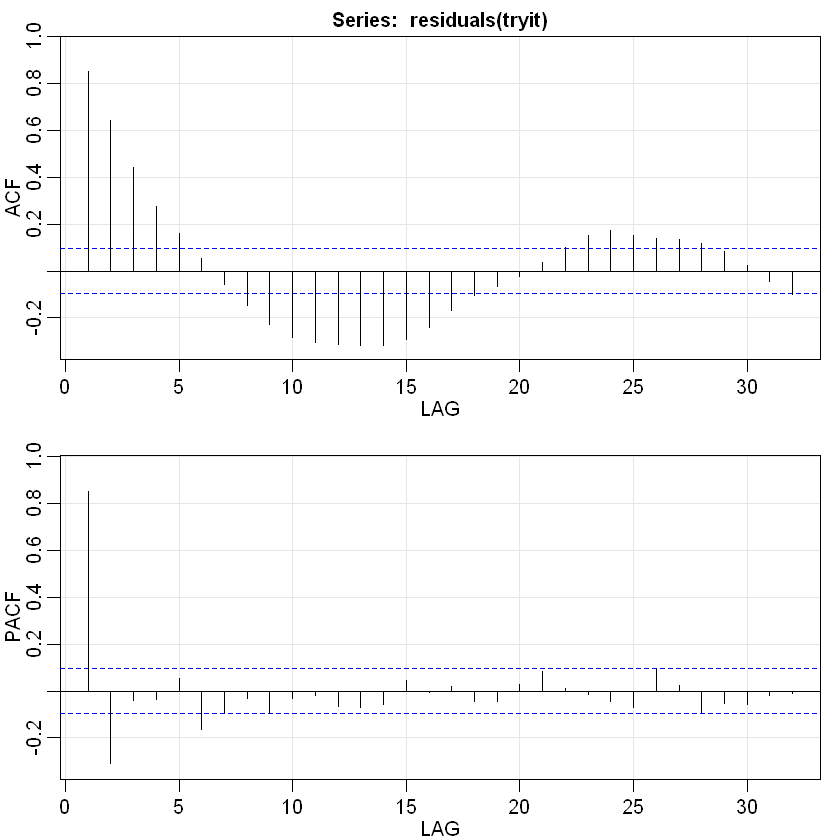

In [17]:

acf2(residuals(tryit))
tryit2 = lm(rec~reclag1+reclag2+soilag5+soilag6+soilag7+soilag8+soilag9+soilag10,
data = alldata)
summary (tryit2)


ACF,PACF
-0.01,-0.01
0.00,0.00
0.04,0.04
-0.13,-0.13
0.05,0.05
0.12,0.12
-0.09,-0.08
0.05,0.03
-0.05,-0.05
-0.10,-0.07



Call:
lm(formula = rec ~ reclag1 + reclag2 + soilag5 + soilag6, data = alldata)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.763  -3.022  -0.040   3.035  27.695 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   8.76807    1.00640   8.712  < 2e-16 ***
reclag1       1.24694    0.04336  28.759  < 2e-16 ***
reclag2      -0.37251    0.03864  -9.639  < 2e-16 ***
soilag5     -20.83104    1.10577 -18.838  < 2e-16 ***
soilag6       8.63164    1.43779   6.003 4.06e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.089 on 438 degrees of freedom
Multiple R-squared:  0.9376,	Adjusted R-squared:  0.9371 
F-statistic:  1647 on 4 and 438 DF,  p-value: < 2.2e-16


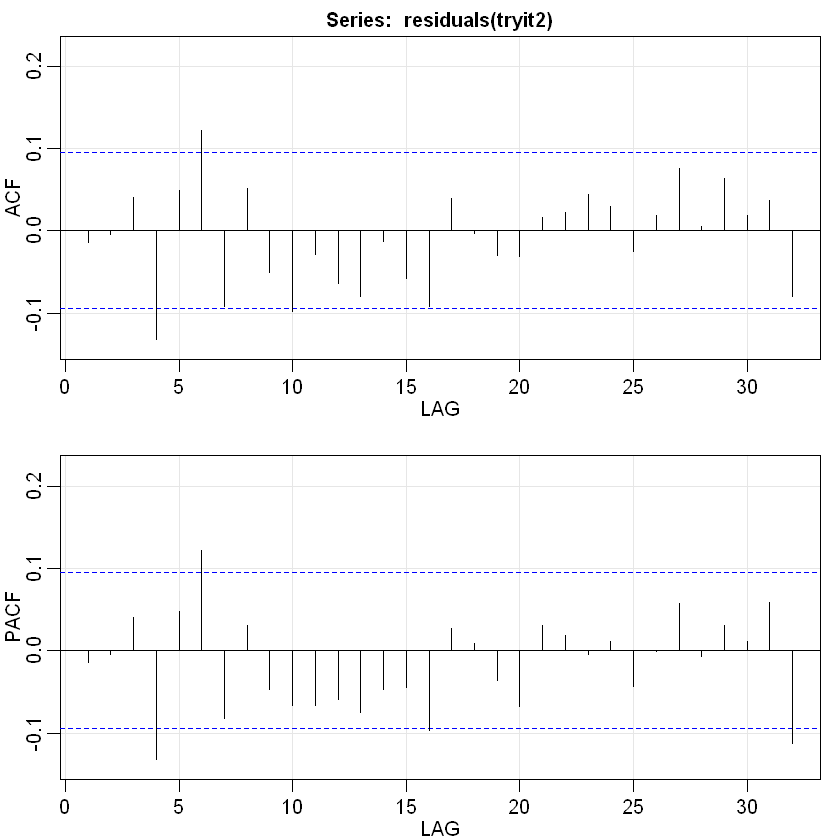

In [18]:
acf2(residuals(tryit2))
tryit3 = lm(rec~reclag1+reclag2+ soilag5+soilag6, data = alldata)
summary (tryit3)


ACF,PACF
0.02,0.02
-0.02,-0.02
0.00,0.00
-0.16,-0.16
0.02,0.02
0.10,0.10
-0.08,-0.08
0.04,0.02
-0.05,-0.05
-0.09,-0.05


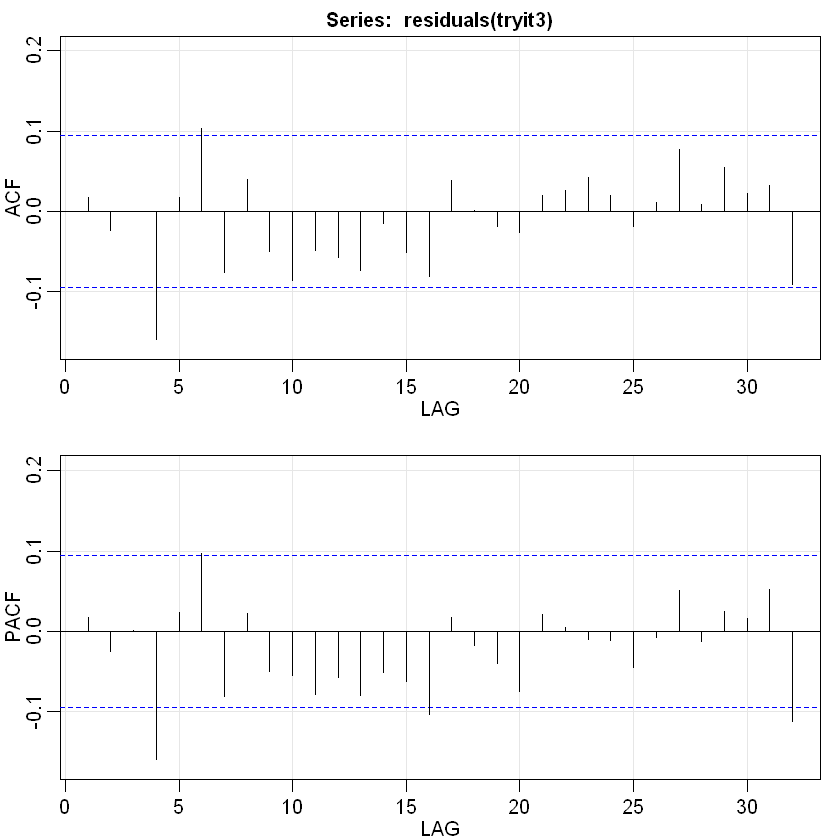

In [19]:
acf2(residuals(tryit3))